In [13]:
import numpy as np
import pandas as pd

import dask.dataframe as dd
import dask.array as da
import dask.bag as db
import dask

from distributed import Client
from os import cpu_count
client = Client(n_workers=cpu_count())
from time import sleep

D:\Users\yanghuilin\anaconda3\lib\site-packages\distributed\node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 63884 instead
  warnings.warn(


In [3]:
index = pd.date_range('2021-09-01',periods=2400,freq='1H')
df = pd.DataFrame({'a':np.arange(2400),'b':list('abcaddbe')*300},index=index)
dff = dd.from_pandas(df,npartitions=10)
dff

,a,b
npartitions=10,,
2021-09-01 00:00:00,int32,object
2021-09-11 00:00:00,...,...
...,...,...
2021-11-30 00:00:00,...,...
2021-12-09 23:00:00,...,...


In [3]:
dff.divisions
dff.partitions[0]

,a,b
npartitions=1,,
2021-09-01,int32,object
2021-09-11,...,...


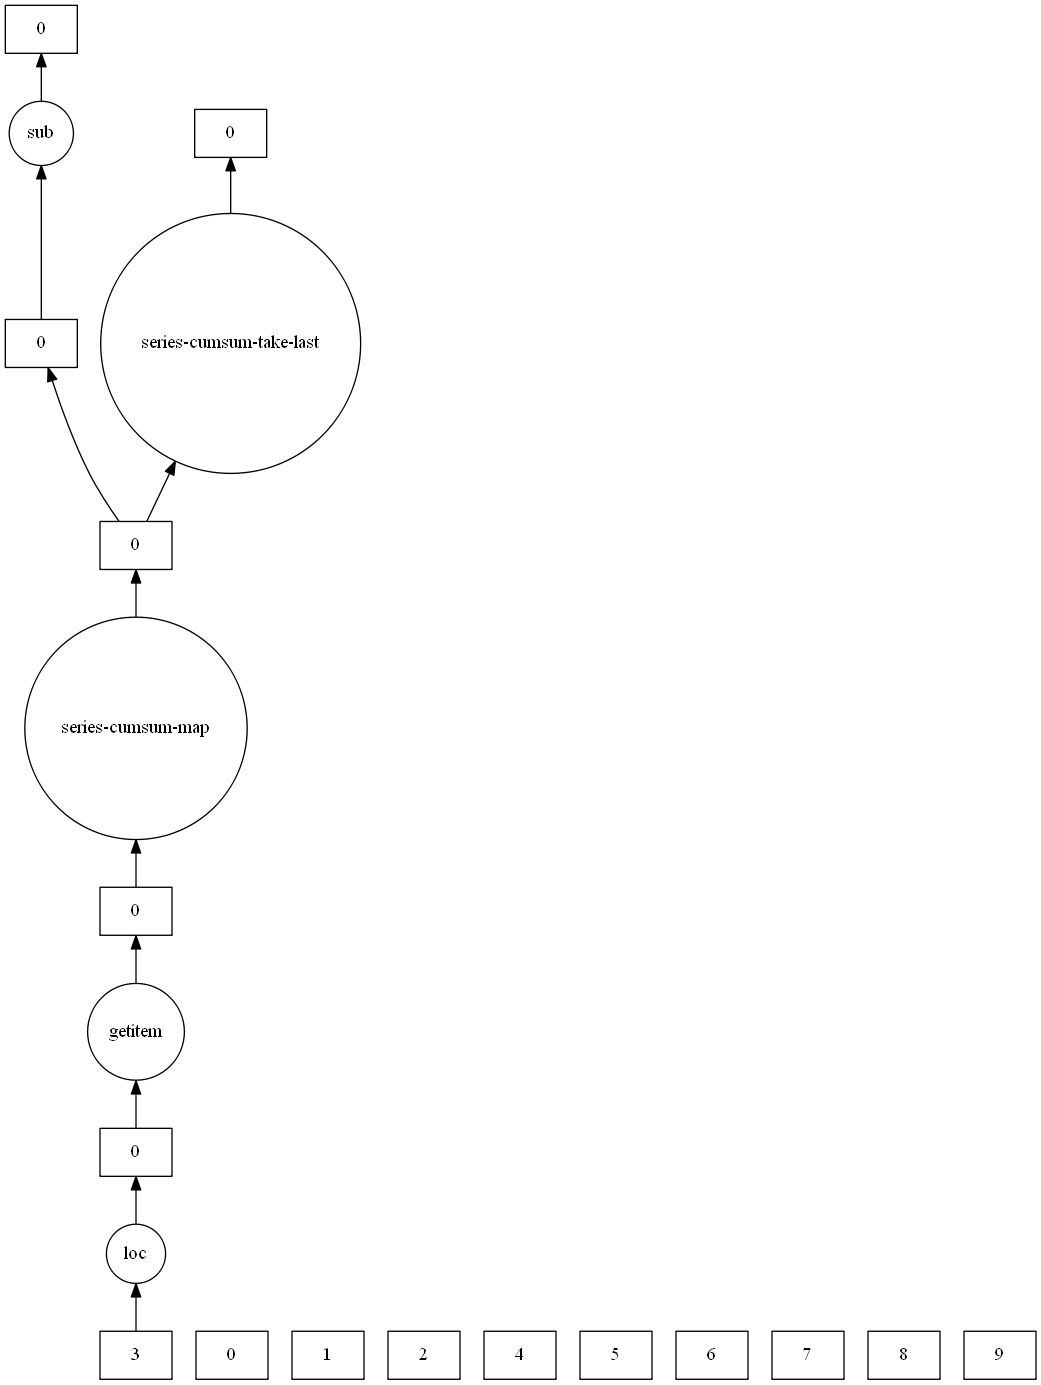

In [4]:
result = dff["2021-10-01": "2021-10-09 5:00"].a.cumsum() - 100
result.visualize()

In [5]:


@dask.delayed
def inc(x):
   return x + 1

@dask.delayed
def add(x, y):
   return x + y

a = inc(1)       # no work has happened yet
b = inc(2)       # no work has happened yet
c = add(a, b)    # no work has happened yet

c.compute() 

5

In [6]:


def inc(x):
   return x + 1


def add(x, y):
   return x + y

a = inc(1)       # no work has happened yet
b = inc(2)       # no work has happened yet
c = add(a, b)    # no work has happened yet

c

5

In [7]:
data = np.arange(100_000).reshape(200, 500)
a = da.from_array(data, chunks=(100, 100))

In [8]:
a.blocks[0]

dask.array<blocks, shape=(100, 500), dtype=int32, chunksize=(100, 100), chunktype=numpy.ndarray>

In [9]:
a.max(axis=0)[::-1].compute()

array([99999, 99998, 99997, 99996, 99995, 99994, 99993, 99992, 99991,
       99990, 99989, 99988, 99987, 99986, 99985, 99984, 99983, 99982,
       99981, 99980, 99979, 99978, 99977, 99976, 99975, 99974, 99973,
       99972, 99971, 99970, 99969, 99968, 99967, 99966, 99965, 99964,
       99963, 99962, 99961, 99960, 99959, 99958, 99957, 99956, 99955,
       99954, 99953, 99952, 99951, 99950, 99949, 99948, 99947, 99946,
       99945, 99944, 99943, 99942, 99941, 99940, 99939, 99938, 99937,
       99936, 99935, 99934, 99933, 99932, 99931, 99930, 99929, 99928,
       99927, 99926, 99925, 99924, 99923, 99922, 99921, 99920, 99919,
       99918, 99917, 99916, 99915, 99914, 99913, 99912, 99911, 99910,
       99909, 99908, 99907, 99906, 99905, 99904, 99903, 99902, 99901,
       99900, 99899, 99898, 99897, 99896, 99895, 99894, 99893, 99892,
       99891, 99890, 99889, 99888, 99887, 99886, 99885, 99884, 99883,
       99882, 99881, 99880, 99879, 99878, 99877, 99876, 99875, 99874,
       99873, 99872,

In [10]:
b = db.from_sequence([1, 2, 3, 4, 5, 6, 2, 1], npartitions=2)
b.filter(lambda x: x % 2).compute()


[1, 3, 5, 1]

In [7]:

def inc(x):
    sleep(1)
    return x+1

def add(x,y):
    sleep(1)
    return x+y


In [12]:
%%time
x = inc(1)
y = inc(1)
z = add(x,y)

Wall time: 3.04 s


In [8]:
from dask import delayed
x = delayed(inc)(1)
y = delayed(inc)(2)
z = delayed(add)(x,y)


In [14]:
%%time
z.compute()

Wall time: 2.04 s


5

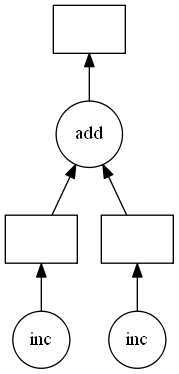

In [9]:
z.visualize()

In [10]:
data = [1,2,3,4,5,6,7,8]

In [11]:
%%time
result = []
for x in data:
    y = inc(x)
    result.append(y)
total = sum(result)

Wall time: 8.07 s


In [22]:
%%time
@dask.delayed
def sum_list(x):
    result = []
    for i in x:
        y = inc(i)
        result.append(y)
    return sum(result)
    

Wall time: 0 ns


Wall time: 223 ms


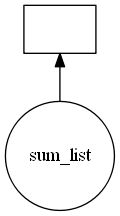

In [24]:
%%time
# sum_list(data).compute()
sum_list(data).visualize()


In [27]:
def double(x):
    sleep(1)
    return 2 * x

def is_even(x):
    return not x % 2

data = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


0

In [34]:
results = []

for x in data:
    y = delayed(inc)(x)
    results.append(y)
    
total = delayed(sum)(results)
print("Before computing:", total)  # Let's see what type of thing total is
result = total.compute()
print("After computing :", result)

Before computing: Delayed('sum-5a10240f-778b-4c67-beaf-6324b1a9d446')
After computing : 65


In [30]:
b = db.from_sequence(['Alice', 'Bob', 'Charlie', 'Dan', 'Edith', 'Frank'])
b.groupby(len).compute()  

[(7, ['Charlie']), (3, ['Bob', 'Dan']), (5, ['Alice', 'Edith', 'Frank'])]

In [31]:
b = db.from_sequence(list(range(10)))
b.groupby(lambda x: x % 2).compute()

[(0, [0, 2, 4, 6, 8]), (1, [1, 3, 5, 7, 9])]

In [32]:
b.groupby(lambda x: x % 2).starmap(lambda k, v: (k, max(v))).compute()

[(0, 8), (1, 9)]

In [33]:
b.foldby(lambda x: x % 2, binop=max, combine=max).compute()

[(0, 8), (1, 9)]

In [ ]:
b = {'name': 'Alice', 'transactions': [{'amount': 1, 'id': 123}, {'amount': 2, 'id': 456}]}  
b.foldby(sum,binop=,combine=)